In [1]:
# Importing libraries needed
import random
import numpy as np  # for matrices, array, linear algebra
import pandas as pd  # open source data analysis and manipulation
import matplotlib.pyplot as plt

def LinearReg(x,y):  # Code for regression using the Normal Equation (X.T*X)*theta = (X.T*y)
    X = np.hstack([np.ones((x.shape[0],1)),x])  # Concatenate x with a column of ones on the left
    theta=np.linalg.solve(X.T @ X, X.T @ y)
    return theta

def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_linear(theta,x,y): # Gradient for linear regression
    z=x.dot(theta)
    gradient = (1/len(x))* x.T @ (z-y)
    return gradient

def grad_linear_stoch (theta,x,y): # Gradient for stochastic linear regression
    z=x.dot(theta)
    gradient = (1/len(x))*x*(z-y)
    return gradient

def grad_logistic(theta,x,y): # Gradient for logistic regression
    z=x.dot(theta)
    gradient = (1/len(x))*(x.T @ (sigmoid(z)-y))
    return gradient

def GradientDescent(x,y,theta,alpha,iteration,grad): # Code for gradient descent
    X = np.hstack([np.ones((x.shape[0],1)),x]) # Concatenate x with a column of ones on the left
    for i in range(iteration):
        theta = theta - alpha*grad(theta,X,y)
    return theta

def StochasticGD(x,y,theta,alpha,iteration,grad): # Code for stochastic gradient descent
    X = np.hstack([np.ones((x.shape[0],1)),x]) # Concatenate x with a column of ones on the left
    for i in range(iteration):
        k=random.randint(1,x.shape[0]-1)
        theta = theta - alpha*grad(theta,X[k],y[k])
    return theta

def newton_method(x, y, num_iterations):
    X = np.hstack([np.ones((x.shape[0],1)),x])  # Concatenate x with a column of ones on the left
    m, n = X.shape  
    theta = np.zeros(n)  # Initialize the parameters
    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T,(h-y))/m  # Calculate the gradient and Hessian
        diagonal = np.diag(h*(1-h))
        hessian = (1/m)*np.dot(X.T, np.dot(diagonal,X))
        theta = theta - np.dot(np.linalg.inv(hessian), gradient) # Update theta using Newton's method
    return theta

### This is the logistic regression example in Lesson 16, using Newton's method.

In [2]:
SP=pd.read_csv("StudyPass.csv") 
names = list(SP) # this gives us a list of column names
d=SP.shape[1]-1 # this is the number of input columns

X = SP[names[0:d]] # Data for Input/feature variables
Y = SP.Pass # Output variable data

theta = newton_method(X, Y, 10)
print(theta)

[-6.46634676  1.56860492]


### This is the logistic regression example in Lesson 16, using gradient descent.

In [3]:
SP=pd.read_csv("StudyPass.csv") 
names = list(SP) # this gives us a list of column names
d=SP.shape[1]-1 # this is the number of input columns

X = SP[names[0:d]] # Data for Input/feature variables
Y = SP.Pass # Output variable data
               
theta=GradientDescent(X,Y,np.array([0,0]),0.5,10000,grad_logistic)

print(theta)

[-6.46634676  1.56860492]


### Run the above two cells and write code similar to the above two cells to do Homework 8 Question 3.

In [4]:
HW=pd.read_csv("hw8q3.csv") 
names = list(HW) # this gives us a list of column names
d=HW.shape[1]-1 # this is the number of input columns

X = HW[names[0:d]] # Data for Input/feature variables
Y = HW.y # Output variable data

<Figure size 640x480 with 0 Axes>

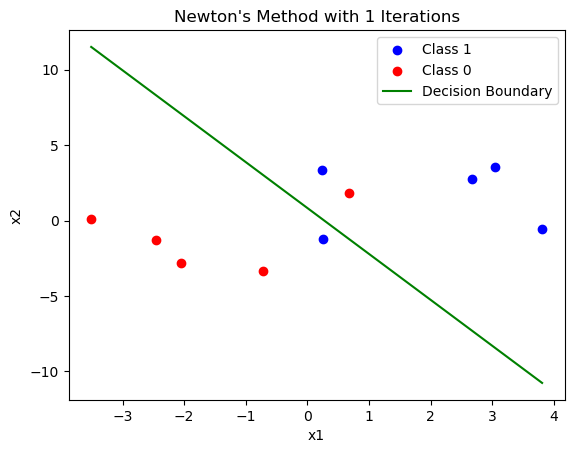

<Figure size 640x480 with 0 Axes>

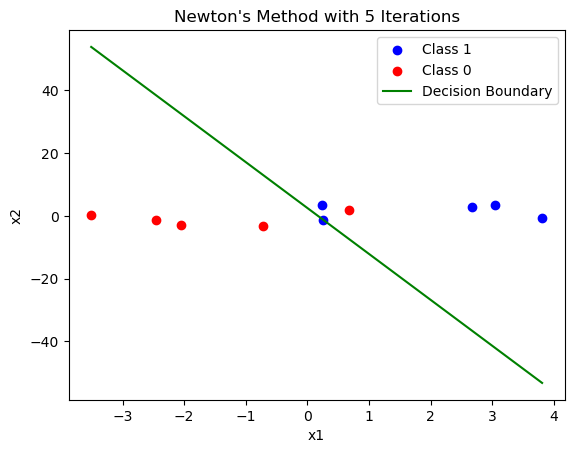

<Figure size 640x480 with 0 Axes>

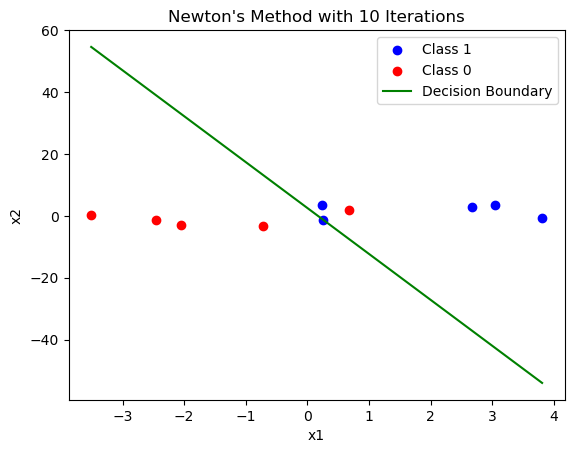

In [5]:
%matplotlib inline

# Newton's Method Cases
theta_init = np.array([0, 0, 0])
newton_thetas = [
    newton_method(X, Y, iterations)
    for iterations in [1, 5, 10]
]

# Plotting results for Newton's Method
def plot_decision_boundary(theta, X, Y, title):
    plt.figure()
    
    # Plot data points
    plt.scatter(X[Y == 1].iloc[:, 0], X[Y == 1].iloc[:, 1], color='blue', label='Class 1')
    plt.scatter(X[Y == 0].iloc[:, 0], X[Y == 0].iloc[:, 1], color='red', label='Class 0')
    
    # Plot decision boundary
    x_values = np.array([X.iloc[:, 0].min(), X.iloc[:, 0].max()])
    y_values = -(theta[0] + theta[1] * x_values) / theta[2]
    plt.plot(x_values, y_values, label="Decision Boundary", color="green")
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.title(title)
    plt.show()

# Generate plots for Newton's Method
for i, theta in enumerate(newton_thetas):
    plt.figure()
    plot_decision_boundary(theta, X, Y, f"Newton's Method with {max(1, i * 5)} Iterations")
    plt.show()

<Figure size 640x480 with 0 Axes>

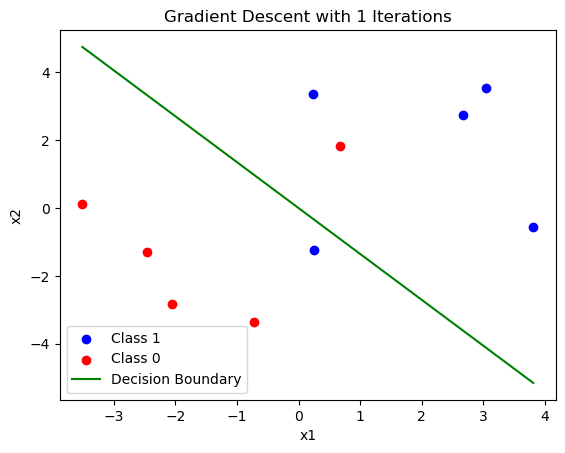

<Figure size 640x480 with 0 Axes>

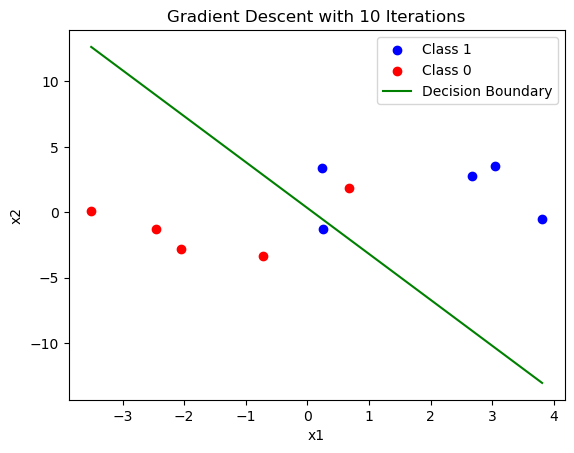

<Figure size 640x480 with 0 Axes>

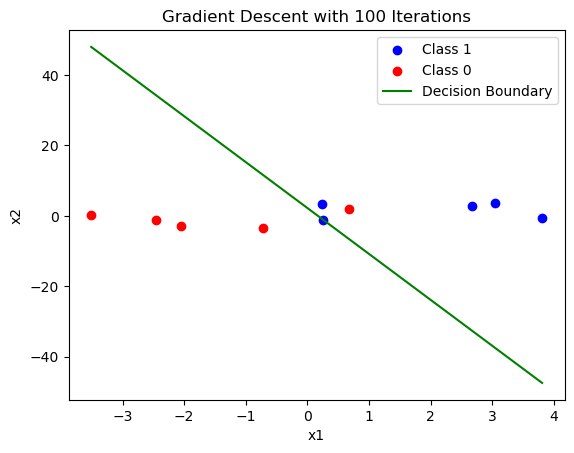

<Figure size 640x480 with 0 Axes>

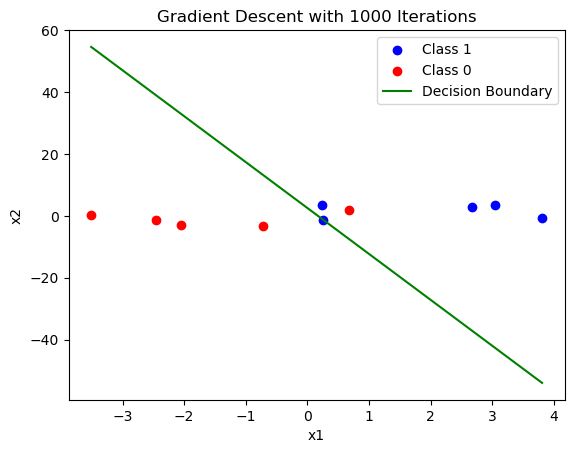

<Figure size 640x480 with 0 Axes>

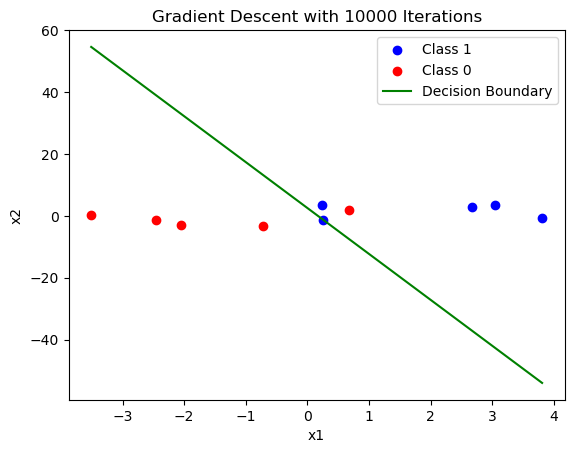

In [6]:
# Gradient Descent Cases
gradient_descent_thetas = [
    GradientDescent(X, Y, theta_init, 0.5, iterations, grad_logistic)
    for iterations in [1, 10, 100, 1000, 10000]
]

# Generate plots for Gradient Descent
for i, theta in enumerate(gradient_descent_thetas):
    plt.figure()
    plot_decision_boundary(theta, X, Y, f"Gradient Descent with {10**i} Iterations")
    plt.show()

### Homework 8 Question 4.
### Run the code in the next cell. This is an example showing that we get the same result of linear regression from the normal equation and from gradient descent. On the other hand, convergence from stochastic gradient descent is more uncertain.


In [7]:
Newton = pd.read_csv("Houses.csv") 
Newton = (Newton - Newton.mean()) / Newton.std()

Y = Newton.PRICE
X = Newton[["LIVING_AREA", "BEDROOMS"]]

theta=LinearReg(X,Y)
print("theta from normal eq: ", theta)

theta=GradientDescent(X,Y,np.array([1,0.1,0.2]),0.1,10000,grad_linear)
print("theta from gradient descent: ", theta)

theta=StochasticGD(X,Y,np.array([1,0.1,0.2]),0.1,10000,grad_linear_stoch)
print("theta from stochastic gradient descent: ", theta)

theta from normal eq:  [-3.04054227e-18  8.72070533e-01  3.38691136e-02]
theta from gradient descent:  [-2.77377739e-17  8.72070533e-01  3.38691136e-02]
theta from stochastic gradient descent:  [-0.01425834  0.83354568 -0.03104227]


### Homework 8 Question 4 continues...
### Run the code in the next cell to get a plot of the convergence of (Batch) Gradient Descent. Write code to add a plot of the convergence of Stochastic Gradient Descent on top of the previous plot.


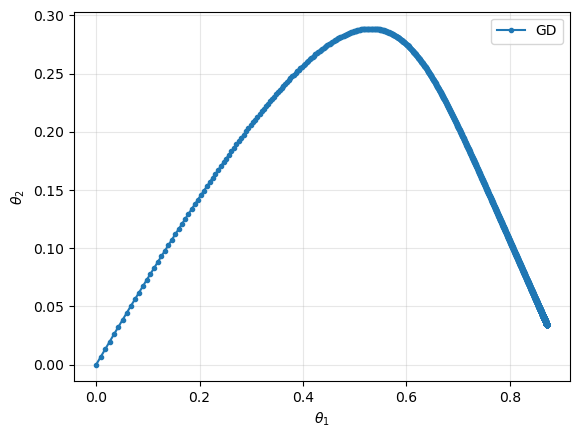

In [8]:
def GradientDescent_record(x,y,theta,alpha,iteration,grad): # Code for gradient descent, recording history
    X = np.hstack([np.ones((x.shape[0],1)),x]) # Concatenate x with a column of ones on the left
    history = np.empty((iteration+1, theta.shape[0]))
    history[0] = theta.flatten()
    for i in range(iteration):
        theta = theta - alpha*grad(theta,X,y)
        history[i+1] = theta.flatten()
    return history

# do GD and record the values for theta at each iteration
theta = np.array([0,0,0])
grd = GradientDescent_record(X,Y,theta,0.01,10000,grad_linear)

plt.plot(grd[:,1],  grd[:,2], marker=".", label="GD")

plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')

plt.grid(alpha=.3)
plt.legend()
plt.show()


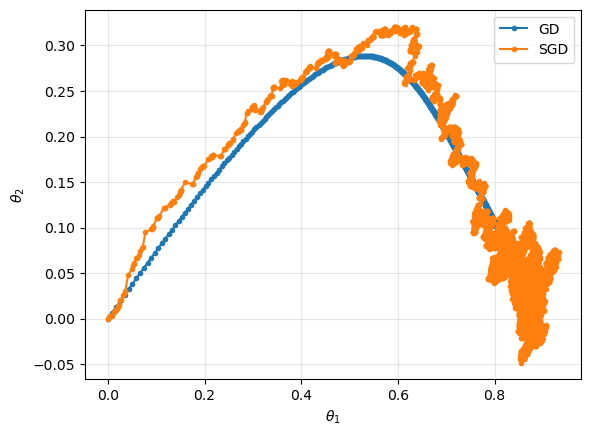

In [9]:
def StochasticGD_record(x, y, theta, alpha, iteration, grad):  # Code for stochastic gradient descent
    X = np.hstack([np.ones((x.shape[0], 1)), x])  # Concatenate x with a column of ones on the left
    history = np.empty((iteration + 1, theta.shape[0]))
    history[0] = theta.flatten()
    for i in range(iteration):
        k = random.randint(0, x.shape[0] - 1)
        theta = theta - alpha * grad(theta, X[k], y.iloc[k])
        history[i + 1] = theta.flatten()
    return history

# do GD and record the values for theta at each iteration
theta = np.array([0,0,0])
sgd = StochasticGD_record(X,Y,theta,0.01,10000,grad_linear_stoch)

plt.plot(grd[:,1],  grd[:,2], marker=".", label="GD")
plt.plot(sgd[:,1],  sgd[:,2], marker=".", label="SGD")

plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\theta_2$')

plt.grid(alpha=.3)
plt.legend()
plt.show()